# Introduction
This project leverages concepts and datasets available as part of Merck Molecular Activity Challenge on Kaggle.
https://www.kaggle.com/c/MerckActivity/overview
"When developing new medicines it is important to identify molecules that are highly active toward their intended targets but not toward other targets that might cause side effects. The objective of this competition is to identify the best statistical techniques for predicting biological activities of different molecules, both on- and off-target, given numerical descriptors generated from their chemical structures. The challenge is based on 15 molecular activity data sets, each for a biologically relevant target. Each row corresponds to a molecule and contains descriptors derived from that molecule's chemical structure."


# Background and References
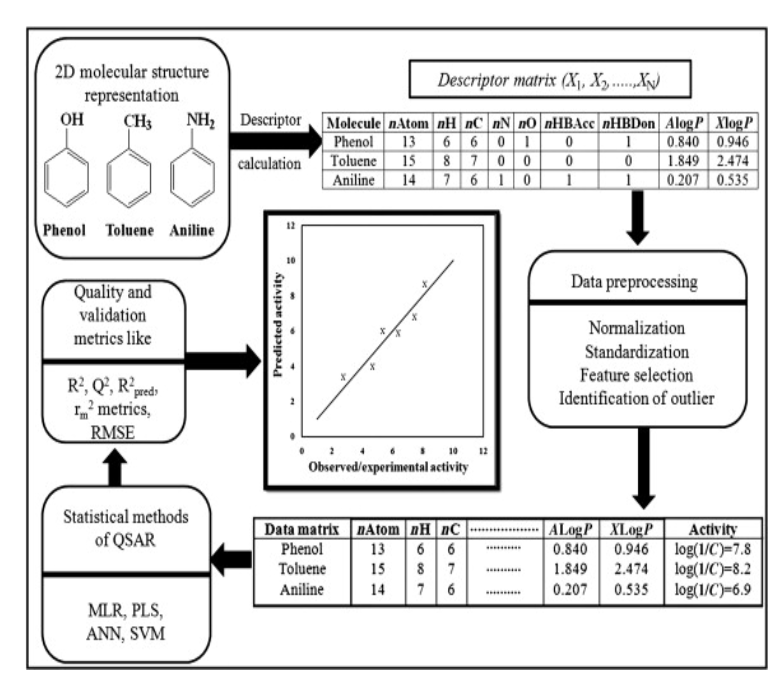

https://www.sciencedirect.com/topics/medicine-and-dentistry/molecular-descriptor

## Import libraries and packages

In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from skimage.io import imread, imshow
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Import Activity 7 Training Data and Explore

Scope of this project exercise is limited to Training Dataset 7

In [3]:
cmpdAct7TrData = pd.read_csv("../data/ACT7_competition_training.csv",index_col=0)
print(cmpdAct7TrData.shape)
cmpdAct7TrData.head()

(1569, 4506)


,Act,D_37,D_38,D_39,D_40,D_42,D_43,D_44,D_45,D_46,...,D_10739,D_10740,D_10741,D_10742,D_10744,D_10745,D_10746,D_10747,D_10764,D_10770
MOLECULE,,,,,,,,,,,,,,,,,,,,,
ACT7_M_5058,70.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACT7_M_6406,74.68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACT7_M_12634,2.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACT7_M_17594,0.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACT7_M_17627,73.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Activity')

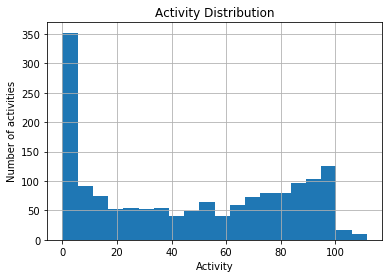

In [4]:
cmpdAct7TrData["Act"].hist(bins=20)
sns.mpl.pyplot.title("Activity Distribution")
sns.mpl.pyplot.ylabel("Number of activities")
sns.mpl.pyplot.xlabel("Activity")

## Random Forest Regressor with 10 fold cross validation

In [9]:
X = cmpdAct7TrData.iloc[:,2:]
y = cmpdAct7TrData.Act

rf = RandomForestRegressor(n_estimators=20)
cross_val_scores = np.abs(cross_val_score(rf,X,y,scoring = "neg_mean_squared_error", cv=10))
rmse_cross_val_scores = list(map(np.sqrt, cross_val_scores))
print("Mean 10-fold rmse: ", str(np.mean(rmse_cross_val_scores)))
print("Std 10-fold rmse: ", str(np.std(rmse_cross_val_scores)))

Mean 10-fold rmse:  22.28691896579021
Std 10-fold rmse:  2.1408032959701586


## Playing around with n_estimators and other methods

In [14]:
cross_val_score(LinearRegression(),X,y)

array([-8.65111377e+19, -7.85405302e+17, -1.90703020e+18])

In [15]:
cross_val_score(DecisionTreeRegressor(),X,y)

array([0.20831884, 0.13954541, 0.23912197])

In [16]:
mdt = DecisionTreeRegressor()
cross_val_scores = np.abs(cross_val_score(mdt,X,y,scoring = "neg_mean_squared_error", cv=10))
rmse_cross_val_scores = list(map(np.sqrt, cross_val_scores))
print("Mean 10-fold rmse: ", str(np.mean(rmse_cross_val_scores)))
print("Std 10-fold rmse: ", str(np.std(rmse_cross_val_scores)))

Mean 10-fold rmse:  30.03180598994542
Std 10-fold rmse:  2.5587424978666813


## Next Steps

#### >Try feature scaling and PCA with different modeling techniques
#### >Explore more datasets available in the challenge
#### >Discuss with some QSAR(Quantitative Structure Activity Relationship) experts about these datasets

## Acknowledgements
#### *Nathan Grossman
#### *Jhonsen Djajamuliadi

## Presentation Feedback 21-OCT-2019
##### Try H2O library 
##### Try global feature importance and local feature importance
##### Try SVM